In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('/content/weatherHistory.csv')  # change path if uploaded differently

# Step 3: Display first few rows
print("First five rows:")
display(df.head())

# Step 4: Basic info
print("\nDataset Info:")
print(df.info())

# Step 5: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 6: Quick statistical summary
print("\nSummary statistics:")
display(df.describe())


First five rows:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None

Missing values per column:
Formatted Date       

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [3]:
from sklearn.preprocessing import StandardScaler

# Step 2a: Convert 'Formatted Date' to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Step 2b: Drop irrelevant or redundant columns
df_cleaned = df.drop(columns=['Daily Summary', 'Loud Cover'], errors='ignore')

# Step 2c: Handle missing values — only for numeric columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].mean())

# Step 2d: Normalize numeric features
scaler = StandardScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Step 2e: Verify
print("✅ Cleaning complete. Data preview:")
display(df_cleaned.head())
print("\nMissing values remaining:", df_cleaned.isnull().sum().any())


✅ Cleaning complete. Data preview:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.101685
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.105960
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.108610
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,-0.381489,-0.459071,0.486521,0.476306,0.758881,1.306976,0.112628
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,-0.332631,-0.362469,0.486521,0.033841,0.665756,1.306976,0.113483



Missing values remaining: True


In [4]:
# Step 3: Normalize numeric features
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df_cleaned.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Display normalized data
print("\n✅ Normalized Dataset Preview:")
df_normalized.head()



✅ Normalized Dataset Preview:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,0.506975,0.523486,0.89,0.221130,0.699164,0.983,0.970135
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,0.505085,0.521084,0.86,0.223399,0.721448,0.983,0.970613
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,0.505445,0.553144,0.89,0.061523,0.568245,0.929,0.970909
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,0.487805,0.501947,0.83,0.220877,0.749304,0.983,0.971358
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,0.495365,0.517356,0.83,0.172970,0.721448,0.983,0.971454


In [5]:
# Step 4: Apply K-Means Clustering
from sklearn.cluster import KMeans

# Select features for clustering (only numeric)
X = df_normalized.select_dtypes(include=['float64', 'int64'])

# Choose number of clusters (you can adjust later)
k = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model
df_normalized['Cluster'] = kmeans.fit_predict(X)

# Display the cluster centers
print("\n✅ Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=X.columns))

# Display the first few records with assigned clusters
print("\n✅ Clustered Dataset Preview:")
df_normalized.head()



✅ Cluster Centers:
   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         0.568753                  0.598224  0.709807           0.169894   
1         0.397424                  0.424576  0.912334           0.135707   
2         0.518069                  0.546428  0.799460           0.179527   
3         0.743226                  0.770988  0.451847           0.194908   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
0                0.239966         0.767847              0.963570  
1                0.457959         0.278138              0.954058  
2                0.811101         0.746009              0.958420  
3                0.658388         0.717405              0.956632  

✅ Clustered Dataset Preview:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Cluster
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,0.506975,0.523486,0.89,0.221130,0.699164,0.983,0.970135,2
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,0.505085,0.521084,0.86,0.223399,0.721448,0.983,0.970613,2
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,0.505445,0.553144,0.89,0.061523,0.568245,0.929,0.970909,2
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,0.487805,0.501947,0.83,0.220877,0.749304,0.983,0.971358,2
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,0.495365,0.517356,0.83,0.172970,0.721448,0.983,0.971454,2


In [7]:
df_normalized.columns


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Cluster'],
      dtype='object')

   Temperature (C)  Humidity  Cluster Weather Type
0         0.506975      0.89        2       Cloudy
1         0.505085      0.86        2       Cloudy
2         0.505445      0.89        2       Cloudy
3         0.487805      0.83        2       Cloudy
4         0.495365      0.83        2       Cloudy


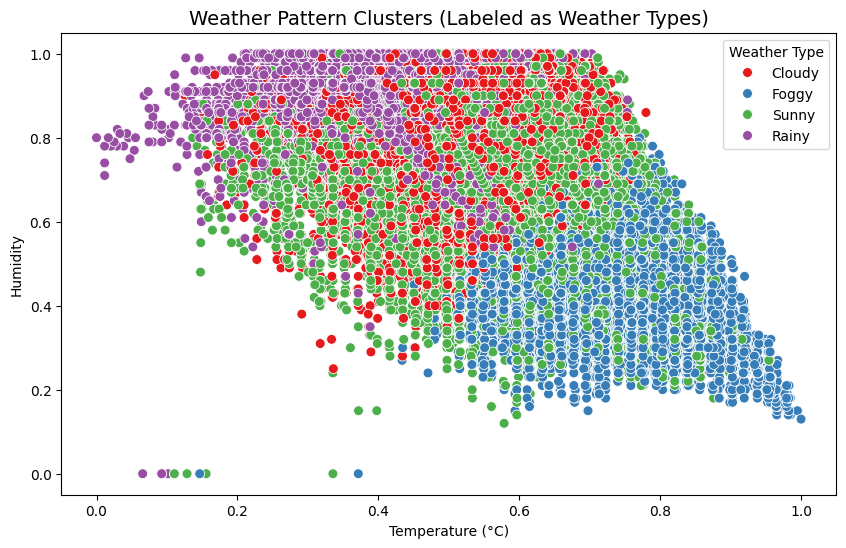

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define cluster names manually
cluster_labels = {
    0: 'Sunny',
    1: 'Rainy',
    2: 'Cloudy',
    3: 'Foggy'
}

# Map numeric cluster to name
df_normalized['Weather Type'] = df_normalized['Cluster'].map(cluster_labels)

# Show a few samples
print(df_normalized[['Temperature (C)', 'Humidity', 'Cluster', 'Weather Type']].head())


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_normalized,
    x='Temperature (C)',
    y='Humidity',
    hue='Weather Type',
    palette='Set1',
    s=50
)
plt.title("Weather Pattern Clusters (Labeled as Weather Types)", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity")
plt.legend(title="Weather Type")
plt.show()


In [14]:
# Sort by date
df_normalized = df_normalized.sort_values(by='Formatted Date')

# Convert date column to datetime
df_normalized['Formatted Date'] = pd.to_datetime(df_normalized['Formatted Date'])

# Create lag features (previous day’s temperature and humidity)
df_normalized['Prev_Temp'] = df_normalized['Temperature (C)'].shift(1)
df_normalized['Prev_Humidity'] = df_normalized['Humidity'].shift(1)

# Drop missing first row
df_normalized = df_normalized.dropna()

# Select features and target
X = df_normalized[['Prev_Temp', 'Prev_Humidity']]
y_temp = df_normalized['Temperature (C)']   # Regression target
y_weather = df_normalized['Cluster']        # Classification target


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
_, _, y_train_weather, y_test_weather = train_test_split(X, y_weather, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Train regression model for temperature
temp_model = RandomForestRegressor(random_state=42)
temp_model.fit(X_train, y_train_temp)

# Train classifier model for weather type
weather_model = RandomForestClassifier(random_state=42)
weather_model.fit(X_train, y_train_weather)


RandomForestClassifier(random_state=42)

In [17]:
# Example input: previous day’s temperature and humidity
prev_temp = 20.5
prev_humidity = 70

# Predict next-day temperature
pred_temp = temp_model.predict([[prev_temp, prev_humidity]])[0]

# Predict next-day weather cluster
pred_cluster = weather_model.predict([[prev_temp, prev_humidity]])[0]

# Map cluster to readable weather type
cluster_labels = {0: 'Sunny', 1: 'Rainy', 2: 'Cloudy', 3: 'Foggy'}
pred_weather = cluster_labels[pred_cluster]

print(f"Predicted next-day temperature: {pred_temp:.2f}°C")
print(f"Predicted weather type: {pred_weather}")


Predicted next-day temperature: 0.99°C
Predicted weather type: Foggy


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


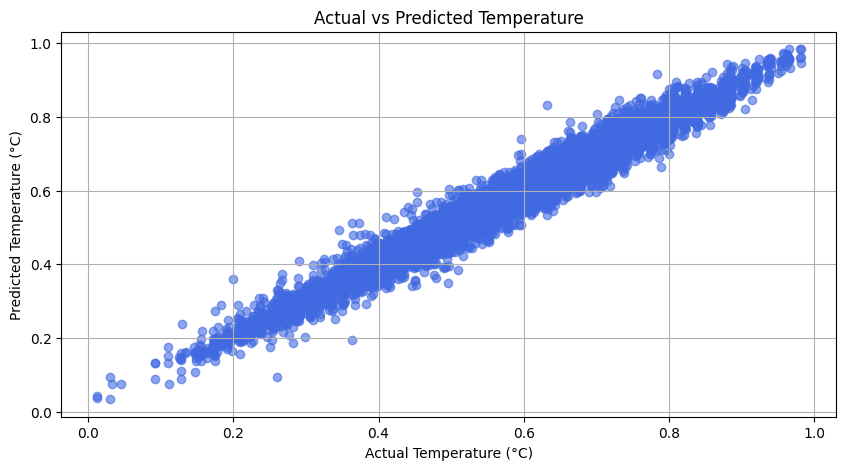

In [18]:
import matplotlib.pyplot as plt

# Predict temperatures on test set
y_pred_temp = temp_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.scatter(y_test_temp, y_pred_temp, color='royalblue', alpha=0.6)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.grid(True)
plt.show()


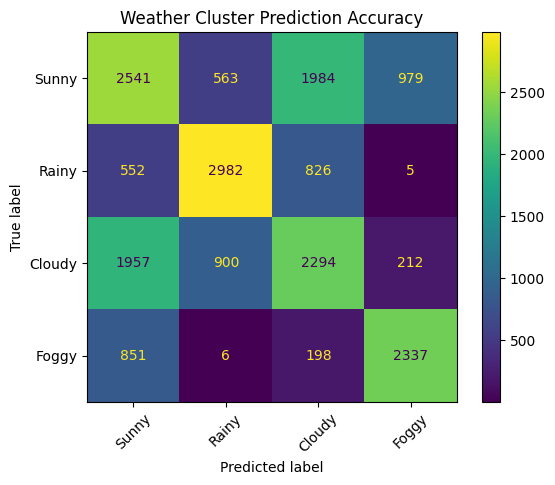

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict weather clusters
y_pred_weather = weather_model.predict(X_test)

# Confusion matrix for weather type classification
cm = confusion_matrix(y_test_weather, y_pred_weather)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cluster_labels.values())
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title('Weather Cluster Prediction Accuracy')
plt.show()


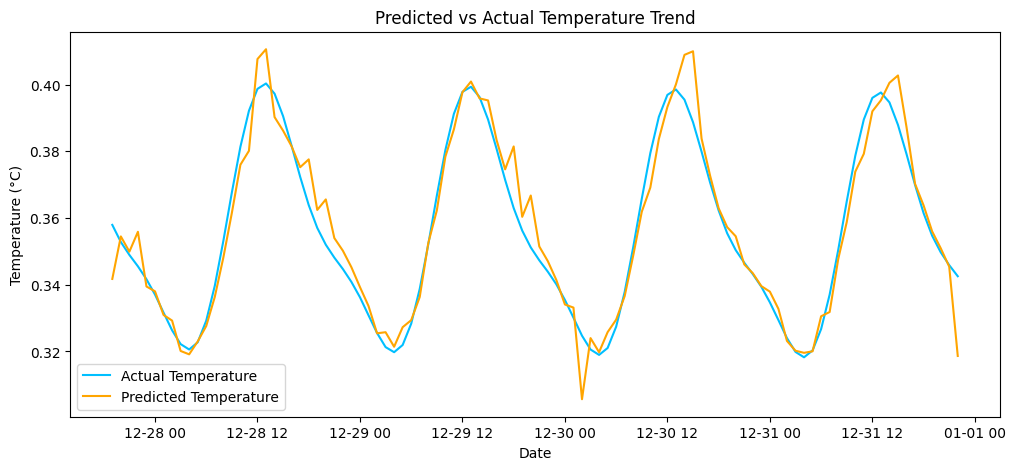

In [20]:
# Select a sample portion for easy visualization
sample = df_normalized.tail(100).copy()
sample['Pred_Temp'] = temp_model.predict(sample[['Prev_Temp', 'Prev_Humidity']])

plt.figure(figsize=(12,5))
plt.plot(sample['Formatted Date'], sample['Temperature (C)'], label='Actual Temperature', color='deepskyblue')
plt.plot(sample['Formatted Date'], sample['Pred_Temp'], label='Predicted Temperature', color='orange')
plt.title('Predicted vs Actual Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()
